In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [18]:
benchmark = "mc"
perf_data = pd.read_csv("perfparsed-" + benchmark + ".csv")
io_data = pd.read_csv("ioparsed-" + benchmark + ".csv")
rapl_data = pd.read_csv("raplparsed-" + benchmark + ".csv")
pmtrace1 = pd.read_csv("tracefile-" + benchmark + ".csv")
# pmtrace2 = pd.read_csv("tracefile2.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'perfparsed-mc.csv'

In [16]:
# processing io_data
io = {}
for i, r in io_data.iterrows():
    t = r['time'] + 1
    p = r['pid']
    if t not in io:
        io[t] = {}
    if p not in io[t]:
        io[t][p] = {'pid': p, 'blocks': 0, 'bytes': 0}
    io[t][p]['blocks'] += r['block']
    io[t][p]['bytes'] += r['byte']

# processing perf_data
# perf_data
perf = {}
for i, r in perf_data.iterrows():
    t = r['time']
    p = r['pid']
    if t not in perf:
        perf[t] = {}
    if p not in perf[t]:
        perf[t][p] = {'pid': p, 'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}
    perf[t][p][r['event']] += r['count']

# res = []
l = max(list(perf.keys())[-1], list(io.keys())[-1])
res = [{'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}] * l
for i in range(l):
    if i in perf:
        for p in perf[i]:
            res[i] = {x: res[i].get(x, 0) + perf[i][p].get(x, 0) for x in set(res[i]).union(perf[i][p])}
    if i in io:
        for p in io[i]:
            res[i] = {x: res[i].get(x, 0) + io[i][p].get(x, 0) for x in set(res[i]).union(io[i][p])}
    res[i].pop('pid', None)

df = pd.DataFrame(res)
pkg = rapl_data['pkg_pwr']
ram = rapl_data['ram_pwr']
df["pkg_pwr"] = pkg
df["ram_pwr"] = ram
df1 = pd.DataFrame()
df1['power'] = pmtrace1['power']
df = df.assign(power=df1['power'])
df = df.dropna()
df.to_csv("final-" + benchmark + ".csv")

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


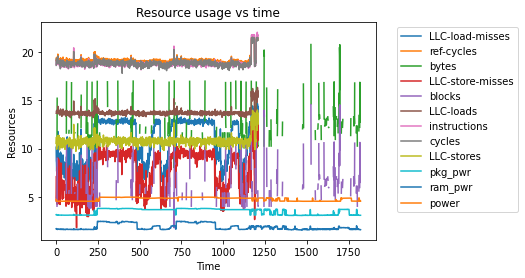

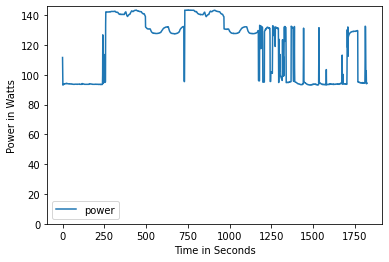

In [17]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

plt.plot(df1)
plt.legend(df1.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.ylim(ymin=0)
plt.show()

In [13]:
perf_data

,time,pid,count,event
0,0,703929,2296830,cycles
1,0,1339,1820921,cycles
2,0,703965,1102053,cycles
3,0,704010,997426,cycles
4,0,703853,557711,cycles
...,...,...,...,...
669047,1108,465031,27,LLC-stores
669048,1108,238520,16,LLC-stores
669049,1108,712386,15,LLC-stores
669050,1108,465024,13,LLC-stores


In [30]:
# processing io_data
io = {}
for i, r in io_data.iterrows():
    t = r['time'] + 1
    p = r['pid']
    if t not in io:
        io[t] = {}
    if p not in io[t]:
        io[t][p] = {'pid': p, 'blocks': 0, 'bytes': 0}
    io[t][p]['blocks'] += r['block']
    io[t][p]['bytes'] += r['byte']

In [31]:
# processing perf_data
# perf_data
perf = {}
for i, r in perf_data.iterrows():
    t = r['time']
    p = r['pid']
    if t not in perf:
        perf[t] = {}
    if p not in perf[t]:
        perf[t][p] = {'pid': p, 'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}
    perf[t][p][r['event']] += r['count']

In [32]:
list(perf.keys())[-1]

1304

In [33]:
list(io.keys())[-1]

1300

In [34]:
# res = []
l = max(list(perf.keys())[-1], list(io.keys())[-1])
res = [{'cycles': 0, 'instructions': 0, 'ref-cycles': 0, 'LLC-load-misses': 0, 'LLC-loads': 0, 'LLC-store-misses': 0, 'LLC-stores': 0, 'blocks': 0, 'bytes': 0}] * l
for i in range(l):
    if i in perf:
        for p in perf[i]:
            res[i] = {x: res[i].get(x, 0) + perf[i][p].get(x, 0) for x in set(res[i]).union(perf[i][p])}
    if i in io:
        for p in io[i]:
            res[i] = {x: res[i].get(x, 0) + io[i][p].get(x, 0) for x in set(res[i]).union(io[i][p])}
    res[i].pop('pid', None)

In [35]:
df = pd.DataFrame(res)

In [36]:
df = df.dropna()

In [12]:
df

,LLC-stores,instructions,bytes,blocks,LLC-loads,LLC-load-misses,ref-cycles,cycles,LLC-store-misses,pkg_pwr,ram_pwr,power
0,278491,885622270,0,0,3658369,161069,685243750,605772661,8074,29.20,5.83,105.5
1,128814,233916755,3072,6,1461171,82966,339747460,255725815,3825,22.95,5.35,115.4
2,60754,237498784,0,0,2060478,57784,362635210,236782998,4997,22.88,5.35,97.5
3,62619,162986467,0,0,1350093,7055,242264441,180926736,338,22.36,5.17,97.3
4,34965,140764192,253952,496,902583,2772,186027828,177300729,86,22.25,5.00,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,192809,922389517,0,0,4379410,17612,956758115,895510186,1245,40.13,5.69,131.0
1102,205335,1203158525,0,0,5680657,13112,1214261644,1130355393,731,40.12,5.68,130.9
1103,149301,929730102,0,0,4498855,9358,956488327,893452330,658,40.12,5.89,130.8
1104,145708,900448576,0,0,4289903,12855,926044067,846624575,605,40.17,6.19,130.6


In [38]:
# df.drop(df.tail(1).index,inplace=True)

In [39]:
pkg = rapl_data['pkg_pwr']
ram = rapl_data['ram_pwr']
df["pkg_pwr"] = pkg
df["ram_pwr"] = ram

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


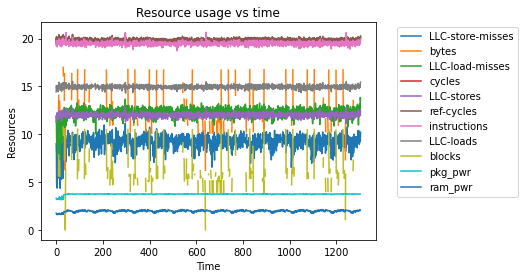

In [40]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [41]:
# df1 = pmtrace1
# df2 = pmtrace2
# df3 = pd.concat([df1['power'], df2['power']], axis=1)
# df3.columns = ['power1', 'power2']
# power = df1['power'] + df2['power']

df1 = pd.DataFrame()
df1['power'] = pmtrace1['power']

In [42]:
df1

,power
0,120.1
1,98.4
2,98.4
3,98.2
4,98.2
...,...
1296,135.5
1297,135.4
1298,135.5
1299,135.5


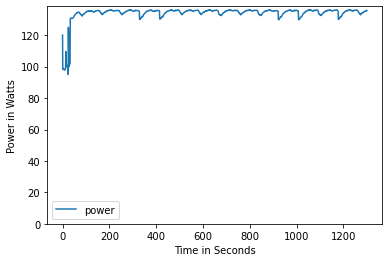

In [43]:
plt.plot(df1)
plt.legend(df1.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.ylim(ymin=0)
plt.show()

In [44]:
# power = list(power[4:len(df)+4])
# for i in range(len(power)):
#     power[i] = round(power[i], 1)

In [45]:
df = df.assign(power=df1['power'])

In [46]:
df = df.dropna()

In [47]:
df

,LLC-store-misses,bytes,LLC-load-misses,cycles,LLC-stores,ref-cycles,instructions,LLC-loads,blocks,pkg_pwr,ram_pwr,power
0,8109,0,141046,295777423,79051,350080479,234678562,1842096,0,27.24,5.74,120.1
1,3263,1601536,77629,490594913,157779,589109220,396685157,3539554,3128,24.40,5.33,98.4
2,113,0,9613,321155049,119493,407016953,241109645,2713281,0,25.01,5.09,98.4
3,103,0,7814,491581208,199088,550485435,314867377,3656476,0,24.79,4.99,98.2
4,79,0,7115,294607495,110472,346053581,204085053,2326189,0,24.89,5.07,98.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,14884,0,185387,406172924,159291,415998088,296721283,3161893,0,42.31,7.28,135.5
1297,12572,253952,147802,338846014,137870,346459418,237696239,2584354,496,42.79,7.49,135.4
1298,7783,0,265177,342297157,140224,371065438,258648307,2796785,0,42.50,7.48,135.5
1299,13273,0,208184,400942722,159829,455830375,356681202,3189821,0,42.80,8.34,135.5


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


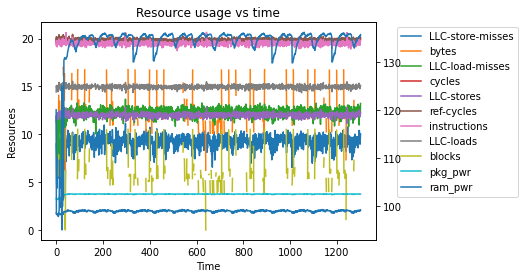

In [48]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))
# df_log = df


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [60]:
dfA = pd.read_csv("finaltest.csv")
dfA = dfA.loc[:, ~dfA.columns.str.contains('^Unnamed')]

In [61]:
dfB = pd.read_csv("final.csv")
dfB = dfB.loc[:, ~dfB.columns.str.contains('^Unnamed')]

In [64]:
df = dfA.merge(dfB, how='outer')

In [96]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [73]:
X

array([[0.00000000e+00, 1.02420000e+04, 1.56210331e+08, ...,
        0.00000000e+00, 2.29300000e+01, 5.35000000e+00],
       [0.00000000e+00, 5.64750000e+04, 3.19874861e+08, ...,
        0.00000000e+00, 2.26900000e+01, 5.29000000e+00],
       [0.00000000e+00, 3.22310000e+04, 2.88579640e+08, ...,
        0.00000000e+00, 2.23200000e+01, 5.20000000e+00],
       ...,
       [1.10592000e+05, 6.86530000e+04, 2.64484240e+08, ...,
        2.16000000e+02, 2.26900000e+01, 5.18000000e+00],
       [0.00000000e+00, 3.70260000e+04, 2.45033607e+08, ...,
        0.00000000e+00, 2.25700000e+01, 5.12000000e+00],
       [0.00000000e+00, 3.13100000e+04, 1.91630435e+08, ...,
        0.00000000e+00, 2.24200000e+01, 5.20000000e+00]])

In [50]:


# Import necessary modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model to the training data
model.fit(X, y)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)


In [51]:
# Import necessary module
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print("Mean absolute error:", mae)

Mean absolute error: 1.2398732301854097e-15


In [37]:
df

,bytes,LLC-stores,ref-cycles,cycles,LLC-store-misses,LLC-loads,instructions,LLC-load-misses,blocks,pkg_pwr,ram_pwr,power
0,0,22541,201563136,142124751,2324,854566,123396131,50636,0,24.96,5.75,120.9
1,454656,66835,422586401,304893818,12975,2154892,324858284,356884,888,34.14,6.39,96.6
2,0,33580,219900108,179442566,1067,1197551,148966890,27160,0,22.65,5.30,96.3
3,0,57881,250149589,212096841,229,1108748,163997503,9144,0,22.34,5.02,95.9
4,57344,41500,171991583,144595096,119,535627,113261212,5756,112,22.31,5.05,95.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0,198425,897905200,806505658,275,3103739,856128234,5866,0,40.04,5.69,129.8
1186,0,250236,1164910644,1092693995,5168,4228385,1149268367,76456,0,40.02,5.53,129.9
1187,0,198936,926440009,894167496,1018,3260371,929436956,9548,0,39.91,5.26,129.8
1188,0,167156,924649954,844743657,456,3120839,897818486,7730,0,39.96,5.33,129.7


In [43]:
df['power'] = df['power'].shift(-3)

In [47]:
df = df[:-3]

In [49]:
df.to_csv("finaltest.csv")

Mean absolute error: 12.069637883008356


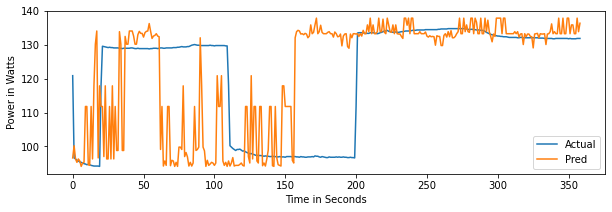

In [97]:
# Use the model to make predictions on the test data
y_pred = model.predict(X)

# Import necessary module
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y, y_pred)

# Print the mean absolute error
print("Mean absolute error:", mae)

df4 = pd.DataFrame({'Actual': y.flatten(), 'Pred': y_pred})

plt.figure(figsize=(10, 3))

plt.plot(df4)
plt.legend(df4.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [23]:
y_test

array([[355.2],
       [354.8],
       [362.4],
       [377.3],
       [358.5],
       [360.2],
       [350.4],
       [352.1],
       [351.6],
       [349.4],
       [354.2],
       [388.9],
       [354.6],
       [350.8],
       [353.4],
       [355.8],
       [352.2],
       [333.6],
       [357.7],
       [335.4],
       [372.2],
       [361.1],
       [356.2],
       [381.2],
       [362.4],
       [354. ],
       [378.7],
       [354.3],
       [353.1],
       [357.2],
       [367.1],
       [348.9],
       [362.5],
       [353. ],
       [343.4],
       [351. ],
       [353. ],
       [356.8],
       [360.9],
       [363. ],
       [331.2],
       [351.3],
       [355.7],
       [349.1],
       [350.9],
       [357.3],
       [352.6],
       [353. ],
       [329.6],
       [393.3],
       [337.1],
       [368.1],
       [353.5],
       [362.1],
       [353.1],
       [361.4],
       [352.2],
       [389. ],
       [360.4],
       [347.2],
       [350.6],
       [353.8],
       [

In [54]:
y_pred

array([324.8, 324.8, 324.8, ..., 329.1, 328.8, 249.3])

In [55]:
y.flatten()

array([248.2, 248.9, 249.5, ..., 343.7, 257. , 256.2])

In [56]:
y

array([[248.2],
       [248.9],
       [249.5],
       ...,
       [343.7],
       [257. ],
       [256.2]])

In [57]:
y_test

array([[333.7],
       [333.7],
       [325.6],
       [337.7],
       [335. ],
       [328.6],
       [335.1],
       [334. ],
       [334.9],
       [299.8],
       [299. ],
       [329.1],
       [329.4],
       [335.8],
       [329.3],
       [336.4],
       [336.1],
       [330.4],
       [335.1],
       [328.8],
       [327.5],
       [345. ],
       [300.8],
       [328.8],
       [328.6],
       [338.2],
       [328.8],
       [331.7],
       [328.6],
       [299.3],
       [335.5],
       [299.8],
       [317.7],
       [329.2],
       [334.1],
       [326.6],
       [300.9],
       [329.2],
       [326.4],
       [335.3],
       [325.8],
       [329.1],
       [339.4],
       [300.1],
       [329.3],
       [334.3],
       [329.4],
       [336.6],
       [302.9],
       [334.7],
       [334.3],
       [334.3],
       [326.3],
       [329. ],
       [335.6],
       [332.8],
       [328.7],
       [334.5],
       [329.2],
       [326.8],
       [300.5],
       [319.9],
       [

In [91]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

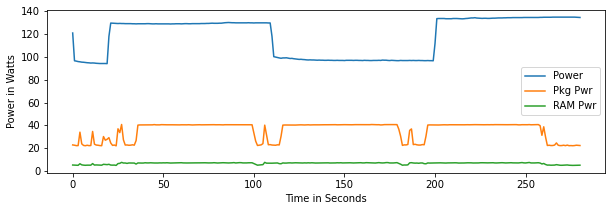

In [77]:
df5 = pd.DataFrame({'Power': df['power'], 'Pkg Pwr': df['pkg_pwr'], 'RAM Pwr': df['ram_pwr']})

plt.figure(figsize=(10, 3))

plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [49]:
df.to_csv("final-" + benchmark + ".csv")